<a href="https://colab.research.google.com/github/AnitaTasnim/image_processing/blob/main/MRI_Brain_tumor_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#finding the MRI brain tumor detection dataset

In [1]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import glob #travel in directories and get all files with necessary extension
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import cv2 # for image processing




#Reading images

In [2]:
tumor  = []
path = '/content/drive/MyDrive/Projects and research/brain tumor/brain_tumor_dataset/yes/*.jpg'

for f in glob.iglob(path):
  img = cv2.imread(f)
  img = cv2.resize(img,(128,128))
  b,g,r = cv2.split(img)
  img = cv2.merge([r,g,b])
  tumor.append(img)






In [3]:
healthy  = []
path = '/content/drive/MyDrive/Projects and research/brain tumor/brain_tumor_dataset/no/*.jpg'


for f in glob.iglob(path):
  img = cv2.imread(f)
  img = cv2.resize(img,(128,128))
  b,g,r = cv2.split(img)
  img = cv2.merge([r,g,b])
  healthy.append(img)



In [4]:
#convert all of these lists into numpy arrays
healthy  = np.array(healthy)
tumor = np.array(tumor)

tumor.shape

(86, 128, 128, 3)

In [5]:
ALL  =  np.concatenate((healthy,tumor))
ALL.shape

(171, 128, 128, 3)

In [6]:
np.random.choice(10,5)

array([3, 3, 3, 7, 8])

In [7]:

np.random.choice(10,5,replace=False)#will not repeat  numbrs


array([2, 9, 1, 4, 8])

#visualizing Brain MRI images

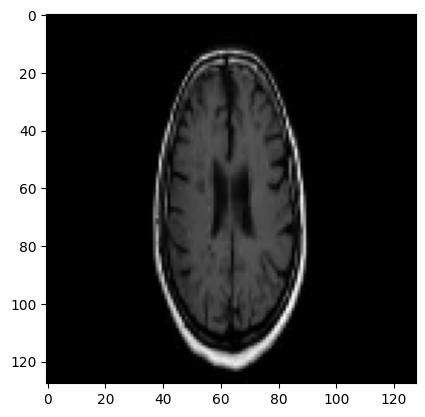

In [8]:
plt.imshow(healthy[0])

In [9]:
def plot_random(healthy,tumor,num=5):

  healthy_imgs = healthy[np.random.choice(healthy.shape[0],num,replace=False)]#will not repeat  numbrs
  tumor_imgs = tumor[np.random.choice(tumor.shape[0],num,replace=False)]#will not repeat  numbrs
  plt.figure(figsize=(16,9))
  for i in range(num):
    plt.subplot(1,num,i+1)
    plt.title('healthy')
    plt.imshow(healthy_imgs[i])

  plt.figure(figsize=(16,9))
  for i in range(num):
    plt.subplot(1,num,i+1)
    plt.title('tumor')
    plt.imshow(tumor_imgs[i])


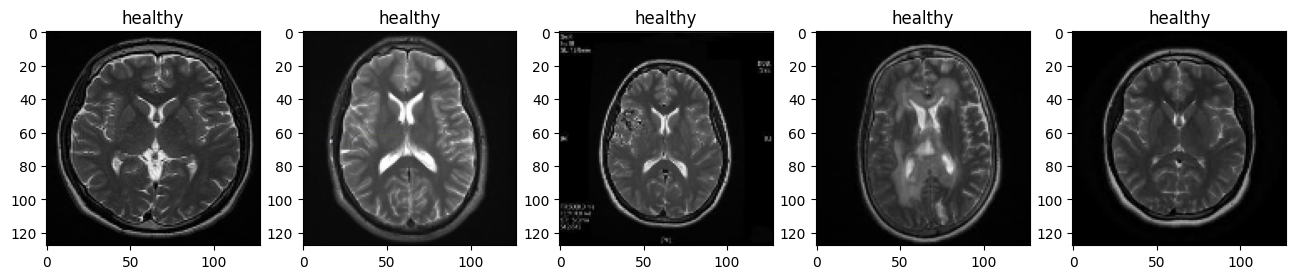

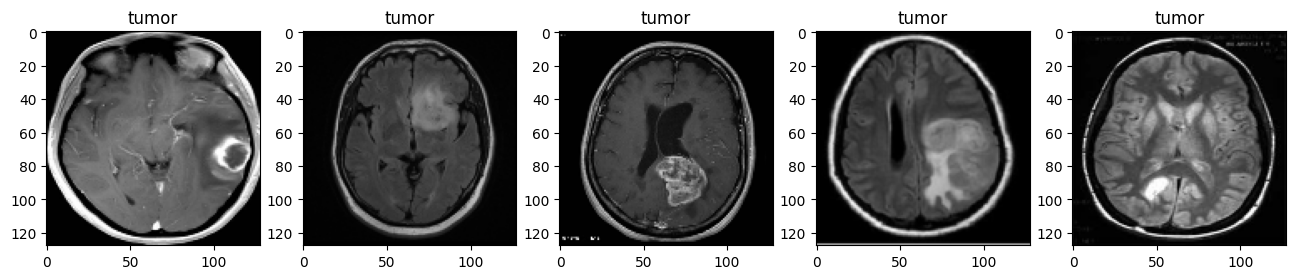

In [10]:
plot_random(healthy,tumor)

#Create Torch dataset Class

when you load a dataset into memory and represent it using a Python object, the entire dataset can indeed behave like an object. By implementing dunder methods such as __len__, __getitem__, and __iter__, you can make your dataset object act as if it were a collection or container of individual data samples (e.g., image

In [11]:
class Dataset(object):
  def __getitem__(self,index):
    raise NotImplementedError
  def __len__(self):
    raise NotImplementedError
  def __add__(self,other):
    return ConcatDataset([self,other])

#Creating MRI custom dataset class

In [12]:
'''class MRI(Dataset):
  def __init__(self,images, labels):
    self.images = images
    self.labels = labels

'''

class MRI(Dataset):
  def __init__(self):

    tumor  = []
    healthy = []
    path_T = '/content/drive/MyDrive/Projects and research/brain tumor/brain_tumor_dataset/yes/*.jpg'
    path_H = '/content/drive/MyDrive/Projects and research/brain tumor/brain_tumor_dataset/no/*.jpg'

    for f in glob.iglob(path_T):
      img = cv2.imread(f)
      img = cv2.resize(img,(128,128))
      b,g,r = cv2.split(img)
      img = cv2.merge([r,g,b])
      tumor.append(img)


    for f in glob.iglob(path_H):
      img = cv2.imread(f)
      img = cv2.resize(img,(128,128))
      b,g,r = cv2.split(img)
      img = cv2.merge([r,g,b])
      healthy.append(img)


    #our images
    tumor = np.array(tumor,dtype = np.float32)
    healthy = np.array(healthy,dtype = np.float32)
    #our lables
    tumor_label = np.ones(tumor.shape[0],dtype = np.float32)
    healthy_label = np.zeros(healthy.shape[0], dtype = np.float32)

    #concatenate
    self.images = np.concatenate((tumor,healthy)) #axis = 0, means concatenate them across first axis     # (100,512,512,3) (200,512,512,3)

    self.labels =  np.concatenate((tumor_label,healthy_label))

  def __len__(self):
    return self.images.shape[0]

  def __getitem__(self,index): #it receives the index and return the data correspond to that index

    sample = {'image': self.images[index], 'label': self.labels[index]}
    return sample

  def normalize(self):
    self.images = self.images/255.0





In [13]:
mri = MRI()

In [14]:
len(mri)

171

In [15]:
mri[5] # image correspoding to the5th indx

{'image': array([[[11., 11., 11.],
         [ 9.,  9.,  9.],
         [14., 14., 14.],
         ...,
         [13., 13., 13.],
         [12., 12., 12.],
         [13., 13., 13.]],
 
        [[ 9.,  9.,  9.],
         [ 9.,  9.,  9.],
         [10., 10., 10.],
         ...,
         [ 9.,  9.,  9.],
         [10., 10., 10.],
         [10., 10., 10.]],
 
        [[14., 14., 14.],
         [ 9.,  9.,  9.],
         [12., 12., 12.],
         ...,
         [13., 13., 13.],
         [ 7.,  7.,  7.],
         [11., 11., 11.]],
 
        ...,
 
        [[10., 10., 10.],
         [10., 10., 10.],
         [10., 10., 10.],
         ...,
         [ 6.,  6.,  6.],
         [12., 12., 12.],
         [10., 10., 10.]],
 
        [[10., 10., 10.],
         [10., 10., 10.],
         [ 9.,  9.,  9.],
         ...,
         [10., 10., 10.],
         [11., 11., 11.],
         [ 8.,  8.,  8.]],
 
        [[10., 10., 10.],
         [10., 10., 10.],
         [ 7.,  7.,  7.],
         ...,
         [13., 13.,

In [16]:
img = mri[5]['image']
img

array([[[11., 11., 11.],
        [ 9.,  9.,  9.],
        [14., 14., 14.],
        ...,
        [13., 13., 13.],
        [12., 12., 12.],
        [13., 13., 13.]],

       [[ 9.,  9.,  9.],
        [ 9.,  9.,  9.],
        [10., 10., 10.],
        ...,
        [ 9.,  9.,  9.],
        [10., 10., 10.],
        [10., 10., 10.]],

       [[14., 14., 14.],
        [ 9.,  9.,  9.],
        [12., 12., 12.],
        ...,
        [13., 13., 13.],
        [ 7.,  7.,  7.],
        [11., 11., 11.]],

       ...,

       [[10., 10., 10.],
        [10., 10., 10.],
        [10., 10., 10.],
        ...,
        [ 6.,  6.,  6.],
        [12., 12., 12.],
        [10., 10., 10.]],

       [[10., 10., 10.],
        [10., 10., 10.],
        [ 9.,  9.,  9.],
        ...,
        [10., 10., 10.],
        [11., 11., 11.],
        [ 8.,  8.,  8.]],

       [[10., 10., 10.],
        [10., 10., 10.],
        [ 7.,  7.,  7.],
        ...,
        [13., 13., 13.],
        [10., 10., 10.],
        [11., 11., 11.]]

In [17]:
img_label = mri[5]['label']
img_label

1.0

In [18]:
img.shape

(128, 128, 3)

In [19]:
np.max(img)

255.0

In [20]:
np.min(img)

3.0

In [21]:
mri.normalize()
img = mri[5]['image']


In [22]:
np.max(img)

1.0

In [23]:
np.min(img)

0.011764706